# GD in torch
The implementation in the previous notebook is pretty verbose and basic. Let us reimplement it using the `pytorch` library.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from utils import make_data
import numpy as np

Generate the data as before. For use with pytorch, the data must be converted to a tensor object. Since the bias will be automatically taken care of, we only take the second column of `X`.

In [16]:
X,y,theta_true = make_data(D=1, T=250)
X_tensor = torch.from_numpy(X[:,[1]]).float()
y_tensor = torch.from_numpy(y).float()

Linear regression can be achieved by using `Linear` layer. For simplicty and visualization, we stick to the 1D example.

Since we would like to compare different methods, we fix the initial value for theta (in this case `weight` and `bias`).

In [ ]:
#TODO: Complete here
# Look up how to use a `nn.Linear` layer and think about the shape you need to use

mod = nn.Linear(in_features=1, out_features=1) # Input und Output Größen definieren, bias wird automatisch hinzugefügt

with torch.no_grad():
    mod.weight.copy_(torch.tensor([[2.0]]))  # Shape: (out_features, in_features)
    mod.bias.copy_(torch.tensor([1.0]))      # Shape: (out_features,)

We can then use MSE as loss function

In [ ]:
#TODO: Complete here
loss_fun = nn.MSELoss() # Lossfunktion definieren

Moreover, we need an optimizer. `SDG` performs gradient descent.

In [ ]:
optimizer = optim.SGD(mod.parameters(), lr=0.1) # LernrATE EINSTELLEN

Now, to fit the above model to the data, we must set up a loop

In [ ]:
# Number of passes over the dataset
epochs = 500

# We wish to save the trajectory of weight, bias and loss
hist_W = []
hist_b = []
hist_loss = []

#Trainigsloop bleibt auch bei mehrschichtigen Netzen gleich
for epoch in range(epochs):
    pred = mod(X_tensor)  # Forward pass, Output wird berechnet
    loss = loss_fun(pred, y_tensor)  # Compute loss

    optimizer.zero_grad() #Gradienten auf Null setzen
    loss.backward() # Berechne den Gradienten
    optimizer.step() # Optimierungsschritt nach Gradient Descent 

    hist_W.append(mod.state_dict()["weight"].numpy()[0,0])
    hist_b.append(mod.state_dict()["bias"].numpy()[0])

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")


Epoch 0: Loss = 4.5244
Epoch 50: Loss = 0.0156
Epoch 100: Loss = 0.0048
Epoch 150: Loss = 0.0020
Epoch 200: Loss = 0.0013
Epoch 250: Loss = 0.0011
Epoch 300: Loss = 0.0010
Epoch 350: Loss = 0.0010
Epoch 400: Loss = 0.0010
Epoch 450: Loss = 0.0010


As we did in the previous example, let us evaluate the objective function value over a grid.

In [41]:
res = 50
xx = np.linspace(-10.0, 10.0, res)

z = np.zeros([res,res])
for i1,x1 in enumerate(xx):
    for i2,x2 in enumerate(xx):
        z[i2,i1] = (1 / y.size) * np.sum((X @ np.array([[x1],[x2]]) - y)**2)

Now, we can plot the objective function values on the grid and the trajectory taken during optimization

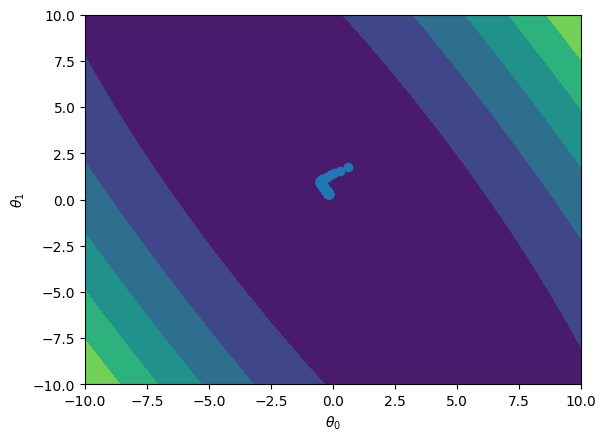

In [42]:
plt.contourf(xx, xx, z)
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.scatter(hist_b, hist_W)